[View in Colaboratory](https://colab.research.google.com/github/MarcinWylot/LearningToRank/blob/master/LearningToRankEDA.ipynb)

http://times.cs.uiuc.edu/course/598f16/l2r.pdf

---

https://medium.com/@nikhilbd/intuitive-explanation-of-learning-to-rank-and-ranknet-lambdarank-and-lambdamart-fe1e17fac418

https://github.com/mottalrd/learning-to-rank/blob/master/experiments/Ranking%20movies.ipynb

--- 

https://towardsdatascience.com/learning-to-rank-with-python-scikit-learn-327a5cfd81f

--- 

https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/MSR-TR-2010-82.pdf

---


https://github.com/szdr/RankNet

https://github.com/airalcorn2/RankNet

---

https://jobandtalent.engineering/learning-to-retrieve-and-rank-intuitive-overview-part-i-5340fcf4a863

https://jobandtalent.engineering/learning-to-retrieve-and-rank-intuitive-overview-part-ii-79c3791c558f

https://jobandtalent.engineering/learning-to-retrieve-and-rank-intuitive-overview-part-iii-1292f4259315

---

https://wellecks.wordpress.com/2015/01/15/learning-to-rank-overview/

--- 

https://github.com/jma127/pyltr

https://github.com/CatalystCode/CustomSearch

--- 

https://www.quora.com/What-are-the-alternatives-to-RankLib

--- 
http://research.microsoft.com/en-us/people/tyliu/listnet.pdf

 http://icml.cc/2015/wp-content/uploads/2015/06/icml_ranking.pdf



In [1]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#download my file
!rm Ranking_dataset_v2.*
downloaded = drive.CreateFile({'id': '1_gLidNJZyR1HLkg6O-5qt_usbXzTngmg'})
downloaded.GetContentFile('./Ranking_dataset_v2.zip')
!unzip Ranking_dataset_v2.zip
!ls -hl

rm: cannot remove 'Ranking_dataset_v2.*': No such file or directory
Archive:  Ranking_dataset_v2.zip
  inflating: Ranking_dataset_v2.csv  
total 2.4G
-rw-r--r-- 1 root root 2.5K Sep  3 08:11 adc.json
-rw-r--r-- 1 root root 2.1G Aug 15 07:52 Ranking_dataset_v2.csv
-rw-r--r-- 1 root root 323M Sep  3 08:12 Ranking_dataset_v2.zip
drwxr-xr-x 2 root root 4.0K Aug 30 21:39 sample_data


In [2]:
import pandas as pd
df = pd.read_csv("Ranking_dataset_v2.csv") #, nrows = 1000)
df.head()

,listing_id,doc_rank,clicked,n0,n1,n2,n3,n4,n5,n6,...,n40,n41,n42,n43,n44,c0,c1,c2,c3,c4
0,0,0,0,87.0,86.0,87.0,0.000000,0.142328,0.007693,0.0,...,99999.0,0.048142,-0.131414,-0.125540,19.99,0,0,4,0,0
1,0,1,0,87.0,86.0,87.0,0.023810,0.758929,0.091036,0.0,...,1000.0,0.060197,-0.131414,-0.125540,17.90,0,0,4,0,0
2,0,2,0,87.0,86.0,87.0,0.000000,0.133929,0.001270,0.0,...,5.0,-0.119726,-0.276582,-0.213422,9.75,0,0,3,0,0
3,0,3,0,87.0,86.0,87.0,0.062500,2.175595,0.276685,0.0,...,600.0,0.191341,-0.131414,-0.125540,19.99,0,0,4,0,0
4,0,4,0,87.0,86.0,87.0,0.026786,1.547619,0.044791,0.0,...,99999.0,-0.137913,-0.131414,-0.125540,7.99,0,0,4,0,0


In [3]:
df.tail()

,listing_id,doc_rank,clicked,n0,n1,n2,n3,n4,n5,n6,...,n40,n41,n42,n43,n44,c0,c1,c2,c3,c4
4885209,99999,55,0,0.0,0.0,0.0,0.0,0.002976,0.000000,0.0,...,50.0,0.520656,0.143999,0.323712,25.90,0,0,4,1,3
4885210,99999,56,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,6.0,0.716215,0.143999,0.323712,109.99,0,0,4,1,3
4885211,99999,57,0,0.0,0.0,0.0,0.0,0.000000,0.000148,0.0,...,10.0,0.420662,0.143999,0.323712,39.00,0,0,4,1,3
4885212,99999,58,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,7.0,0.772205,0.143999,0.323712,124.49,0,0,4,1,3
4885213,99999,59,0,0.0,0.0,0.0,0.0,0.000000,0.000179,0.0,...,3.0,0.896056,0.143999,0.323712,109.99,0,0,4,1,3


In [4]:
df.iloc[:,3:48].describe().T

,count,mean,std,min,25%,50%,75%,max
n0,4885214.0,39.684916,39.597721,0.000000,0.000000,38.000000,80.000000,1.000000e+02
n1,4885214.0,41.562081,41.171245,0.000000,0.000000,41.000000,85.000000,1.000000e+02
n2,4885214.0,40.193456,40.176841,0.000000,0.000000,38.000000,82.000000,1.000000e+02
n3,4885214.0,0.004138,0.013212,0.000000,0.000000,0.000000,0.002976,1.245675e+01
n4,4885214.0,0.235363,0.936733,0.000000,0.005952,0.047619,0.241071,1.731488e+03
n5,4885214.0,0.018071,0.047732,0.000000,0.000000,0.001530,0.014112,1.746423e+01
n6,4885214.0,0.444005,1.810013,0.000000,0.000000,0.000000,0.000000,4.300000e+01
n7,4885214.0,0.022643,0.071658,-1.000000,0.000000,0.010000,0.020000,1.000000e+00
n8,4885214.0,0.096049,0.281229,-1.000000,0.000000,0.000000,0.000000,1.000000e+00
n9,4885214.0,0.113417,0.201447,-1.000000,0.020000,0.040000,0.100000,1.000000e+00


In [5]:
df['clicked'].unique()

array([0, 1])

In [6]:
for i in ['c0','c1','c2','c3','c4']:
  print("unique values for {i}: {vals}".format(i=i, vals = df[i].unique() ) )

unique values for c0: [0 1]
unique values for c1: [0 1 2 3]
unique values for c2: [4 3 6 2 1 7 0 8 5]
unique values for c3: [0 2 1]
unique values for c4: [0 2 1 3]


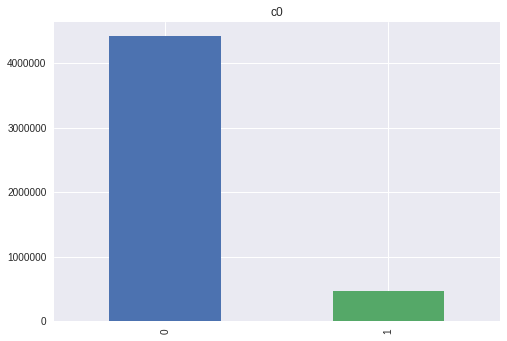

In [7]:
df['c0'].value_counts().plot(kind='bar', title = 'c0')

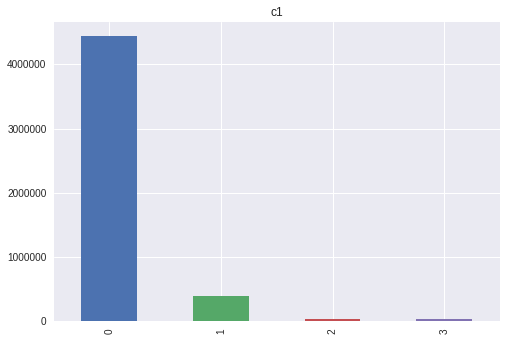

In [8]:
df['c1'].value_counts().plot(kind='bar', title = 'c1')

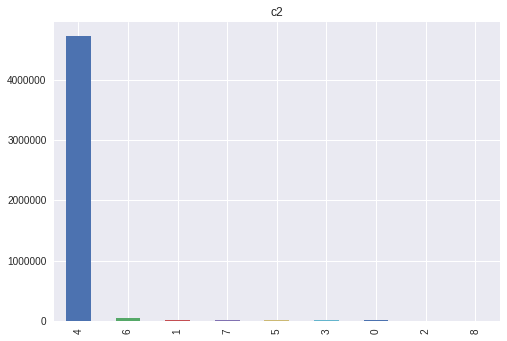

In [9]:
df['c2'].value_counts().plot(kind='bar', title = 'c2')

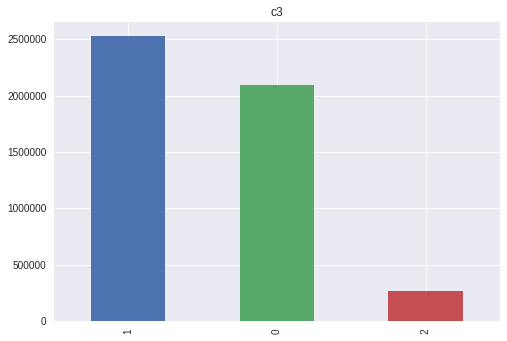

In [10]:
df['c3'].value_counts().plot(kind='bar', title = 'c3')

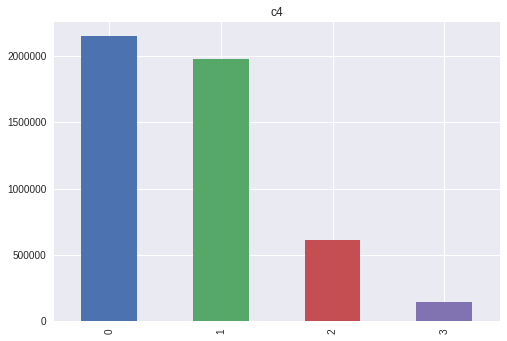

In [11]:
df['c4'].value_counts().plot(kind='bar', title = 'c4')

In [12]:
df.isnull().any().any()

False

In [13]:
df.corr()

,listing_id,doc_rank,clicked,n0,n1,n2,n3,n4,n5,n6,...,n40,n41,n42,n43,n44,c0,c1,c2,c3,c4
listing_id,1.000000,0.000080,0.000100,-0.003232,-0.000492,-0.000785,-0.010839,-0.001531,-0.005907,-0.004016,...,-0.000443,0.008458,0.012907,0.011338,-0.000443,-0.005810,-0.002951,-0.001865,-0.000105,-0.007947
doc_rank,0.000080,1.000000,-0.114247,-0.007767,-0.007300,-0.007473,-0.152504,-0.115818,-0.183209,-0.007314,...,-0.037843,-0.008413,0.013457,0.008422,-0.012047,-0.019199,-0.018956,-0.007058,0.011388,-0.001338
clicked,0.000100,-0.114247,1.000000,0.007101,0.007269,0.006929,0.028709,0.024347,0.023352,-0.002451,...,0.002844,0.004865,-0.003123,-0.002413,0.006346,0.022466,0.016675,-0.000161,-0.013622,-0.002460
n0,-0.003232,-0.007767,0.007101,1.000000,0.915795,0.907384,-0.040438,-0.029510,-0.038562,0.001692,...,-0.024175,0.024924,0.024973,-0.000659,-0.004859,0.003294,0.016854,0.000153,-0.228654,-0.133395
n1,-0.000492,-0.007300,0.007269,0.915795,1.000000,0.978292,-0.043276,-0.031520,-0.041105,0.001474,...,-0.026998,0.028112,0.027062,-0.000426,-0.005327,0.001739,0.016092,0.000224,-0.230014,-0.142959
n2,-0.000785,-0.007473,0.006929,0.907384,0.978292,1.000000,-0.042420,-0.030311,-0.039692,0.002975,...,-0.027267,0.028544,0.027303,0.001547,-0.004784,-0.000159,0.013473,0.000276,-0.231653,-0.143003
n3,-0.010839,-0.152504,0.028709,-0.040438,-0.043276,-0.042420,1.000000,0.766776,0.567932,-0.026430,...,0.278086,-0.187578,-0.118094,-0.039013,-0.007626,-0.078415,-0.076335,-0.010225,0.023990,0.006162
n4,-0.001531,-0.115818,0.024347,-0.029510,-0.031520,-0.030311,0.766776,1.000000,0.375032,-0.007122,...,0.159097,-0.086714,-0.028033,0.017801,0.009631,-0.036031,-0.040979,-0.008505,0.020687,0.001920
n5,-0.005907,-0.183209,0.023352,-0.038562,-0.041105,-0.039692,0.567932,0.375032,1.000000,-0.025063,...,0.278289,-0.161226,-0.077468,-0.008204,-0.008501,-0.097077,-0.087244,-0.007447,0.026366,0.003184
n6,-0.004016,-0.007314,-0.002451,0.001692,0.001474,0.002975,-0.026430,-0.007122,-0.025063,1.000000,...,-0.038846,0.030531,0.037266,0.037608,0.002522,-0.080423,-0.047717,0.001146,-0.000454,-0.001437


In [14]:
df[df['n10'] != 0].head()

,listing_id,doc_rank,clicked,n0,n1,n2,n3,n4,n5,n6,...,n40,n41,n42,n43,n44,c0,c1,c2,c3,c4


In [15]:
df.sort_values(['clicked'],ascending=False).groupby('listing_id').head(3)

,listing_id,doc_rank,clicked,n0,n1,n2,n3,n4,n5,n6,...,n40,n41,n42,n43,n44,c0,c1,c2,c3,c4
1235092,25127,0,1,66.0,53.0,49.0,0.000000,0.035714,0.000000,0.0,...,53.0,0.916334,0.573096,0.059996,58.00,0,0,4,0,0
1711073,34891,4,1,0.0,0.0,0.0,0.002976,2.056548,0.061619,0.0,...,285.0,0.897698,0.931432,1.000000,174.99,0,0,4,1,1
1102098,22389,34,1,68.0,97.0,93.0,0.000000,0.000000,0.000000,0.0,...,15.0,0.188871,0.117358,0.489237,29.00,0,0,4,0,0
3500296,71713,4,1,95.0,63.0,59.0,0.000000,0.014881,0.001740,0.0,...,1000.0,0.698030,0.444921,0.145819,21.99,0,0,4,0,0
2302110,47187,0,1,39.0,39.0,29.0,0.014881,0.380952,0.063008,1.0,...,2515.0,0.871660,0.582865,0.009456,29.99,0,0,4,0,1
2634514,53987,2,1,94.0,67.0,63.0,0.002976,0.098214,0.008860,0.0,...,88.0,0.491202,0.158099,0.250919,53.50,0,0,4,0,0
2949861,60474,3,1,90.0,76.0,78.0,0.000000,0.154762,0.006054,0.0,...,117.0,0.877730,0.774290,0.863793,64.90,0,0,4,1,2
4108973,84202,8,1,0.0,0.0,0.0,0.000000,0.008929,0.000496,0.0,...,50.0,0.881272,0.693369,0.004933,8.99,0,0,4,1,1
4713315,96499,36,1,36.0,85.0,82.0,0.000000,0.000000,0.000000,0.0,...,2.0,0.629591,0.243837,0.067598,46.90,0,0,4,0,0
1979551,40476,0,1,0.0,0.0,0.0,0.011905,0.232143,0.058291,0.0,...,5000.0,0.652911,0.032064,0.040863,79.90,0,0,4,2,2


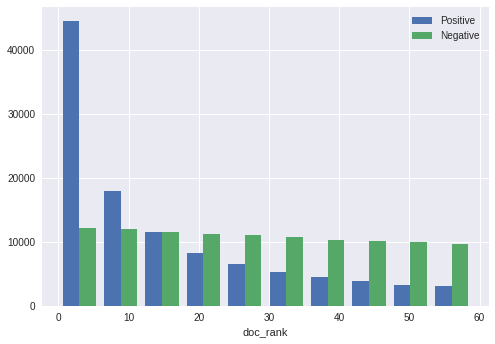

In [16]:
import numpy as np
import matplotlib.pyplot as plt
negative = df[df['clicked'] == 0]['doc_rank']
positive = df[df['clicked'] == 1]['doc_rank']
    
outcomes = np.array(list(zip(positive.values, negative.values)))
plt.hist(outcomes, bins=10, label = ['Positive', 'Negative'])
plt.legend()
plt.xlabel('doc_rank')
plt.show()

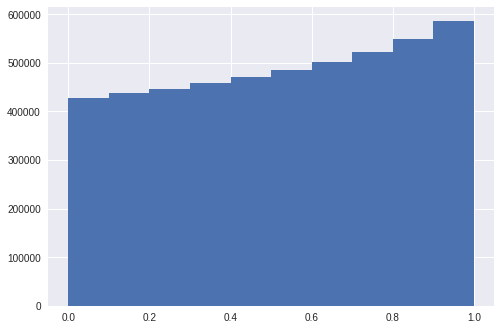

In [17]:
probability = 1 - (df['doc_rank']-min(df['doc_rank']))/(max(df['doc_rank'])-min(df['doc_rank']))
probability.hist()

In [18]:
df.iloc[:,3:44].columns

Index(['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10',
       'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20',
       'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n30',
       'n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n40'],
      dtype='object')

In [19]:
df.iloc[:,45:].columns

Index(['n42', 'n43', 'n44', 'c0', 'c1', 'c2', 'c3', 'c4'], dtype='object')